# Solution Graded Exercise 2: Hodgkin-Huxley model

first name: *Dylan*

last name: *Bourgeois*

sciper: 224797

date: 23/04/2016

*Your teammate*

first name of your teammate: *Tristan*

last name of your teammate: *Besson*

sciper of your teammate: 225524


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex6_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html

** Note **
We have updated question 6.2 of the online exercise. If you have already started with this exercise in week 2, make sure you check the latest version here: http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html. 

# Exercise 6, getting started

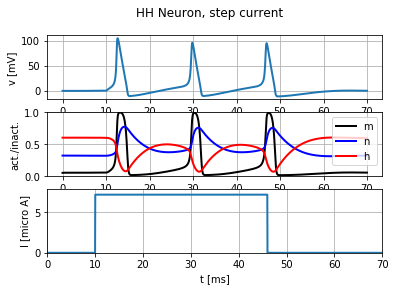

In [30]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

HH.getting_started()

## 6.1. Exercise: step current response

#### 6.1.1 Question

> What is the lowest step current amplitude I_min for generating at least one spike ?

To answer this question we will be testing different input amplitudes in the code below. Shown is the figure for the minimal current we have found to generate a spike, which is $I_{min} = 2.3 µA$.

In [31]:
I_min = 2.3 * b2.uA # Minimal input current to generate a spike

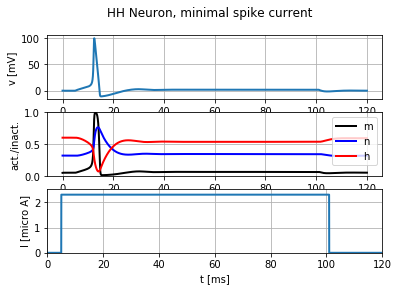

In [32]:
current = input_factory.get_step_current(5, 100, b2.ms, I_min)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal spike current")

#### 6.1.2 Question
> What is the lowest step current amplitude to generate repetitive firing?

We follow the same procedure as for ```6.1.1``` :

In [33]:
I_min_repetitive = 6.5 * b2.uA # Minimal input current to generate repetitive firing

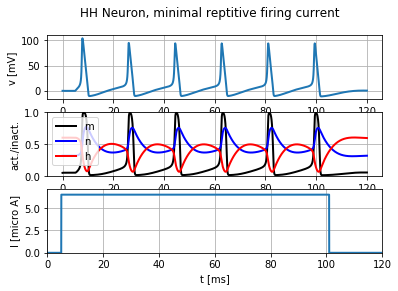

In [34]:
current = input_factory.get_step_current(5, 100, b2.ms, I_min_repetitive)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal reptitive firing current")

> Discuss the difference between the two regimes.

In both cases, the signal keeps the same resting potential at $0mV$, and the spikes appear with an identical shape. 

The first noticable difference between those regimes will reside in the fact that the first spike that will happen faster in the case of multiple spikes. The top of the spike happens around $25 ms$ in the single spike case, versus $15 ms$ in the repetitive firing scenario.

This means the time evolution of the three gating variables would be different. For the single spike case, variable $h$ will see its value slowly decline (resp. grow for $m$ and $n$). In the repetitive firing scenario however, their evolution is much faster. 

In the repetitive firing scenario we inject a stronger current, meaning the concentrations of ions are higher. This implies a higher membrane potential, hence the gating variables react faster (they are voltage dependent).

## 6.2. Exercise: slow and fast ramp current

#### 6.2.1 Question

> What is the membrane voltage at the time when the current injection stops (```t=slow_ramp_t_end```) ?

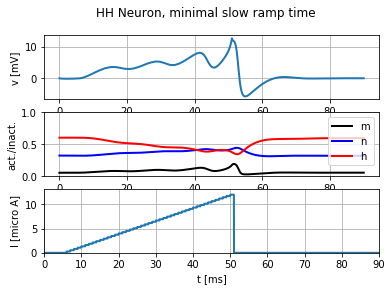

In [35]:
# Time
b2.defaultclock.dt =  0.02 * b2.ms
slow_ramp_t_end    =  50         # no spike

# Current
I_end   = 12.0 * b2.uA
I_start =  0.0 * b2.uA

# Create ramp
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, I_start , I_end)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))

# Plot data to detect spike
HH.plot_data(state_monitor, title="HH Neuron, minimal slow ramp time")

In [ ]:
# Find voltage
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))

voltage_slow=8.78306042 mV


#### 6.2.2. Question

> What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?

In [ ]:
# Time
b2.defaultclock.dt =  0.02 * b2.ms
fast_ramp_t_end    = 88         # no spike, spike at 89
unit_time = 0.1 * b2.ms

# Current
I_end   = 4.5 * b2.uA
I_start = 0.0 * b2.uA

# Create ramp
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, unit_time, I_start, I_end)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*unit_time / b2.defaultclock.dt))

# Plot data to detect spike
HH.plot_data(state_monitor, title="HH Neuron, minimal fast ramp time")

In [ ]:
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

#### 6.2.3 Question

> Discuss the differences between the two situations. Why are the two “threshold” voltages different?

As stated in the introduction of the exercise, the minimal current to elicit a spike doesn't just depend on the amplitude of the current or on its total charge. It also depends on the speed at which the charges will arrive on the neuron and the duration of the current injection.

In the case of the slow ramp, the membrane voltage will slowly increase to $10 mV$, and the gating variables appear to be able to manage the current injection during the time of the simulation.

In the case of the fast ramp, the three gating variables don't change much during the current injection, and a very small spike (approx. $5 mV$) is emitted $5 ms$ after the injection. This can be explained with the accumulation of charges on the capacitance of the model. As the system isn't able to process them as soon as they arrive, the regulation of the model leads it to emit a spike after the injection, explaining the difference in the threshold voltages. 

## 6.3 Rebound Spike

In [ ]:
# Config
I_amp = - 1. * b2.uA
delay = 5 # ms
end = 20 + delay # ms
sim_time = 50 * b2.ms

In [ ]:
# Simulate current 1
current = input_factory.get_step_current(delay, end, b2.ms, I_amp)
state_monitor = HH.simulate_HH_neuron(current, sim_time)
HH.plot_data(state_monitor, title="HH Neuron, Rebound Spike (I_amp = -1 uA)")

There is no spike for ```I_amp=-1 uA```. Let us test for ```I_amp=-5 uA``` :

In [ ]:
# Simulate current 2
current = input_factory.get_step_current(delay, end, b2.ms, I_amp * 5)
state_monitor = HH.simulate_HH_neuron(current, sim_time)
HH.plot_data(state_monitor, title="HH Neuron, Rebound Spike (I_amp = -5 uA)")

#### 6.3.1 Question

> What is happening here ? To which gating variable do you attribute this rebound spike ?

With a small hyperpolarizing spike, the membrane potential decreases to about $-1 mV$. As soon as the injection stops, the membrane potential comes back to its resting potential.

The gating variables stay almost constant, with a very small tendency to act the opposite of in a normal injected current. The variable $h$ grows a little, while the other two, $m$ and $n$, decrease (in a positive current injection the opposite behaviour is observed). 

In the second case, a larger current is injected, leading to a spike after the end of the injection. The gating variables are acting just as before (i.e. mirrored behaviour w.r.t to positive current injection), but with a more noticable evolution. 

However when the variable $h$ reaches a certain threshold, all three gating variables shows the normal behavior of a spike emission.

## 6.4 modified HH implementation

In [ ]:
def simulate_HH_neuron_mod(input_current, simulation_time, NaScale):

    """A Hodgkin-Huxley neuron implemented in Brian2. Modified for the 
       purpose of BMNN class ex 2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """
    
    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * NaScale * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


#### 6.4.1 Question

> What is the minimal current leading to repetitive spiking? Explain.

A minimal current of $1.1 μA$ is sufficient to elicit repetitive spiking, which is way lower than the current needed to generate spikes in the previous implementation. This new observation comes from the increased density of the sodium channels, causing more sodium ions to be able to flow into the cell and raise the membrane potential. Thus, a smaller external input could cause some repetitive spike generation.

In [ ]:
I_min_mod = 1.1 * b2.uA
current = input_factory.get_step_current(5, 100, b2.ms, I_min_mod)
NaScale = 1.4 # Increase Na density by 1.4

# Modified implementation
state_monitor = simulate_HH_neuron_mod(current, 120 * b2.ms, NaScale)
HH.plot_data(state_monitor, title="HH Neuron (modified), repetitive firing")

> Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.

In [ ]:
zero_current = input_factory.get_step_current(0, 100, b2.ms, 0. * b2.uA)
state_monitor = simulate_HH_neuron_mod(zero_current, 120 * b2.ms, NaScale)
HH.plot_data(state_monitor, title="HH Neuron (modified), no input current")

In [ ]:
# Print the resting voltage
voltage_rest = state_monitor.vm[0,-1]
print("voltage_rest={}".format(voltage_rest))

The GHK voltage equation gives the membrane potential as : 
$$V_{rest} = \frac{RT}{F} . ln{\frac{P_K[K^+]_{out} + P_{Na}[Na^+]_{out} + P_{Cl}[Cl_-]_{in}}{P_K[K^+]_{in} + P_{Na}[Na^+]_{in} + P_{Cl}[Cl_-]_{out}}}$$ with the linearized version :

$$V_{rest} = \frac{g_{Na}E_{Na} + g_{K}E_{K} + g_{Cl}E_{Cl}}{g_{Na} + g_{K} + g_{Cl}}$$

In our modified implementation we have augmented the concentration of Na ions (i.e. $g_{Na}$) by a factor $1.4$. Hence the new resting potential can be found with :

$$V_{rest}^{mod} = \frac{1.4 * g_{Na}E_{Na} + g_{K}E_{K} + g_{Cl}E_{Cl}}{1.4 * g_{Na} + g_{K} + g_{Cl}} $$

With the values given we find :

In [ ]:
# Redefine the constants
El  =  10.6 * b2.mV
EK  = -12   * b2.mV
ENa = 115   * b2.mV

gl  =   0.3 * b2.msiemens
gK  =  36   * b2.msiemens
gNa = 120   * b2.msiemens * NaScale

In [ ]:
##### TROUVE PAS LA BONNE VALEUR #####
V_mod_rest = (gNa * ENa + gK * EK + gl * El)/(gNa + gK + gl)
err = V_mod_rest - voltage_rest
print("Computed rest potential = {}. Simulation error = {}".format(V_mod_rest, err))

> If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?

In [ ]:
NaScale = 2
state_monitor = simulate_HH_neuron_mod(zero_current, 120 * b2.ms, NaScale)
HH.plot_data(state_monitor, title="HH Neuron (modified), no input current")

The Hodgkin-Huxley model is expressed as follows :

$$C\frac{du}{dt}=-\sum_k{I_k(t)} + I(t)$$

This means that the current that charges the modelled capacitor (whose discharge models spike generation can come from two sources :

* an external stimulation I(t)
* the ionic currents that appear from a potential difference at the membrane ($\sum_k{I_k(t)}$)

In the absence of external current, usually the potential difference at the membrane (which corresponds to a resting potential) is insufficient to elicit a spike. But as we have shown above, if the sodium concentration grows, the resting potential increases, so much so that if the concentration is high enough, the neuron can fire even at the resting potential.


## 6.5 Reduction to two dimensions: the Morris-Lecar model
This exercise is not available online. All information is given here.


* Implement Morris-Lecar (Box in chapter 4.2 of the book: http://neuronaldynamics.epfl.ch/online/Ch4.S2.html). We give you the correct parameters for the model. If you are unsure of how to implement the dynamics in Brian2, compare with the implementation of the HH model:
http://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/hodgkin_huxley/HH.html#simulate_HH_neuron

* Complete the function plot_state_vars below.

    * Stimulate your Morris-Lecar  neuron with a step current  (130 uAmp for 10ms).  
    * The spike you observe is delayed with  respect to the current onset, then it raises very quickly. Discuss which parameters drive each of the two regimes  and which part of the model is responsible for the transition between the two regimes.

*  On paper, derive the u and w_hat nullclines (w_hat, not w!). Then  insert them into the function get_v_w_nullclines below. 
*  Stimulate  your neuron with  longer current such that you get repetitive firing.  
    *  Plot the response of the system with  plot_state_vars, as you did before
    *  The function plot_phase_plane is given below. Use it to plot the trajectory in the phase plane.
    *  Discuss the phase plane
    



In [ ]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory
from neurodynex.tools import plot_tools

# neuron parameters
EL = -60. * b2.mV
E1 = +60. * b2.mV
E2 = -84. * b2.mV

gL = 2.0 * b2.msiemens
g2 = 8.0 * b2.msiemens
g1 = 9. * b2.msiemens

C = 5. * b2.ufarad

u1 = -1.2*b2.mV
u2 = 18.0*b2.mV
u3 = 7.0*b2.mV
u4 = 10.0*b2.mV

tau_w = 30 * b2.ms

def simulate_MorrisLecar_neuron(input_current, simulation_time):

    # Write the dynamical equations for the neuron model. Make sure you use the variable
    # name "v" for the membrane voltage and "w" for w_hat.
    eqs = """
        I_e = input_current(t,i) : amp
        I_m = I_e - g1*m0*(v-E1) - g2*w*(v-E2) - gL*(v-EL) : amp
        tau = tau_w / cosh((v-u3)/(2*u4)) : second
        dw/dt = (1/tau)*(w0-w) : 1
        w0 = 0.5*(1 + tanh((v-u3)/(u4))) : 1
        m0 = 0.5*(1 + tanh((v-u1)/(u2))) : 1
        dv/dt = I_m / C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.v = EL

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["v", "w", "I_e", "I_m", "w0", "m0"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

def plot_state_vars(state_monitor, title=None):
    #     make three subplots:
    #     1: voltage vs. time
    #     2: m0, w0, w_hat vs. time
    #     3: injection current vs. time

    #     copy the function plot_data from the module neurodynex.hodgkin_huxley.HH and change it accordingly:
    #     http://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/hodgkin_huxley/HH.html
    plt.subplot(311)
    plt.plot(state_monitor.t / b2.ms, state_monitor.v[0] / b2.mV, lw=2)

    plt.xlabel("t [ms]")
    plt.ylabel("v [mV]")
    plt.grid()

    plt.subplot(312)

    plt.plot(state_monitor.t / b2.ms, state_monitor.m0[0] / b2.volt, "black", lw=2)
    plt.plot(state_monitor.t / b2.ms, state_monitor.w[0]  / b2.volt, "blue", lw=2)
    plt.plot(state_monitor.t / b2.ms, state_monitor.w0[0] / b2.volt, "red", lw=2)
    plt.xlabel("t (ms)")
    plt.ylabel("act./inact.")
    plt.legend(("m0", "w_hat", "w0"))
    plt.ylim((0, 1))
    plt.grid()

    plt.subplot(313)
    plt.plot(state_monitor.t / b2.ms, state_monitor.I_e[0] / b2.uamp, lw=2)
    plt.axis((
        0,
        np.max(state_monitor.t / b2.ms),
        min(state_monitor.I_e[0] / b2.uamp) * 1.1,
        max(state_monitor.I_e[0] / b2.uamp) * 1.1
    ))

    plt.xlabel("t [ms]")
    plt.ylabel("I [micro A]")
    plt.grid()

    if title is not None:
        plt.suptitle(title)

    plt.show()

def get_v_w_nullclines(u_values, EL, E1, E2, gL, g2, g1, u1, u2, u3, u4):
    m0 = 0.5 * (1 + np.tanh((u_values-u1)/(u2)))
    w0 = 0.5 * (1 + np.tanh((u_values-u3)/(u4)))
    # F(u,w) 
    v_nullcline = (-g1*gL*m0*(u_values-E1)-gL*gL*(u_values-E2))/(g2*(u_values-E2))
    # G(u,w) = w_0(u) - w_hat => G(u,w) = 0 <=> w_hat = w_0(u)
    w_nullcline = w0 # = w0(u)
    return v_nullcline, w_nullcline


def plot_phase_plane(state_monitor, u_values, v_nullcline, w_nullcline):
    def plt_point_by_index(idx, symb, lbl):
        # helper to plot start and end point of trajectory
        v_i = state_monitor.v[0, idx] / b2.mV
        w_i = state_monitor.w[0, idx]
        plt.plot(v_i, w_i, symb, label = lbl)
        
    plt.plot(u_values / b2.mV, v_nullcline, 'm-', lw=2, label='u-nullcline')
    plt.plot(u_values / b2.mV, w_nullcline, 'g-', lw=2, label='w_hat-nullcline')
    plt.scatter(state_monitor.v[0] / b2.mV, state_monitor.w[0], s=5, color='blue', label="trajectory")
    plt_point_by_index(0, "or", "start")
    plt_point_by_index(len(state_monitor.v[0])-1, "oc", "end")
    plt.legend(loc='best')
    plt.grid()
    plt.ylim([-0.1,1.6])
    plt.xlabel("u [mV]")
    plt.ylabel("w hat")
    plt.title("Phase plane for the Morris-Lecar model")

u_values = np.arange(-80, 60.0, 2.0)*b2.mV
v_nullcline, w_nullcline = get_v_w_nullclines(u_values, EL, E1, E2, gL, g2, g1, u1, u2, u3, u4)

# inject a current, simulate, discuss
I_stim = 130 * b2.uA
current = input_factory.get_step_current(5, 15, b2.ms, I_stim)
state_monitor = simulate_MorrisLecar_neuron(current, 40. * b2.ms)
plot_state_vars(state_monitor)
plot_phase_plane(state_monitor, u_values, v_nullcline, w_nullcline)


The phase plane shown above gives us informations about the spike generation for this model. 

The stable fixed point can be found at the intersection of both nullclines, at the point `(-60, 0)`. At rest, the system will stay here (it is a stable fixed point). 

Under appropriate excitation, the system can leave this fixed point and move along the blue trajectory in a counter-clock wise manner. It will quickly elicit a spike, whose maximum is at `(42, 0.1)`, before slowly falling back to `(20, 0.4)`. 

Then, the sustem will continue more quickly to fall down to its minimum at `(-65, 0.1)` before returning back to the fixed point.